Diabetes Prediction Using ML 


1. Importing liabraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    auc
)

import warnings
warnings.filterwarnings('ignore')


2. Importing Dataset


In [171]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [173]:
df.shape

(768, 9)

In [174]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

3. Preprocessing

In [175]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [176]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [177]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [178]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [179]:
df.fillna(df.median(), inplace=True)
print("\nAfter treatment:\n", df.isnull().sum())


After treatment:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


EDA


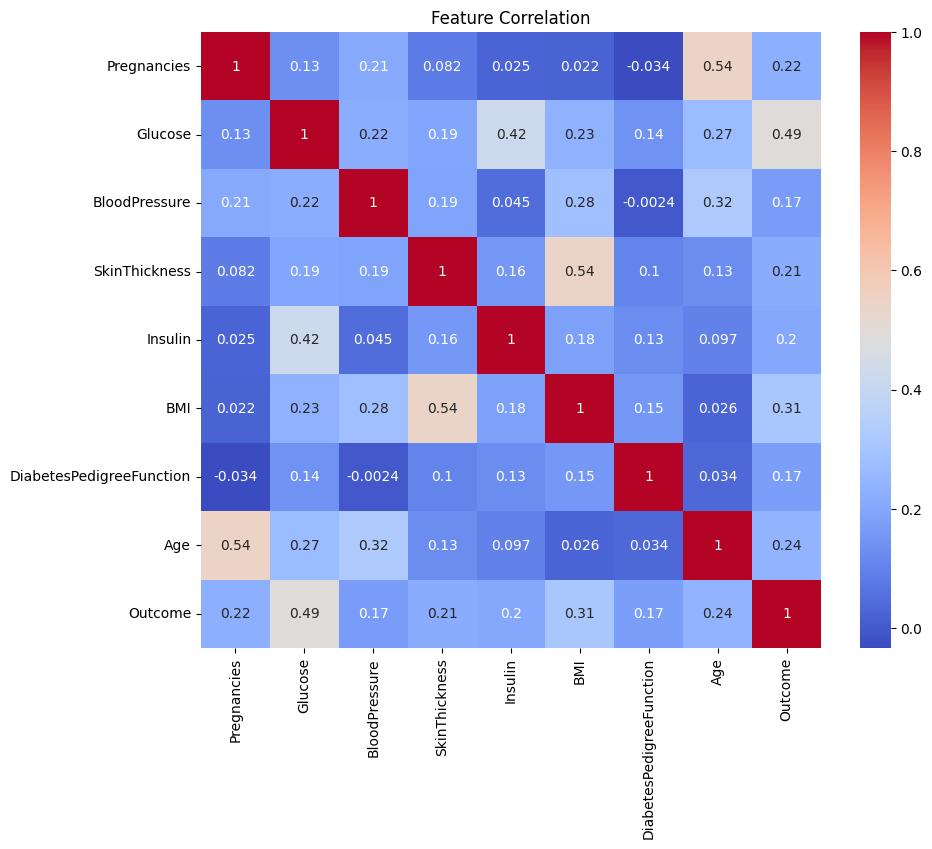

In [180]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

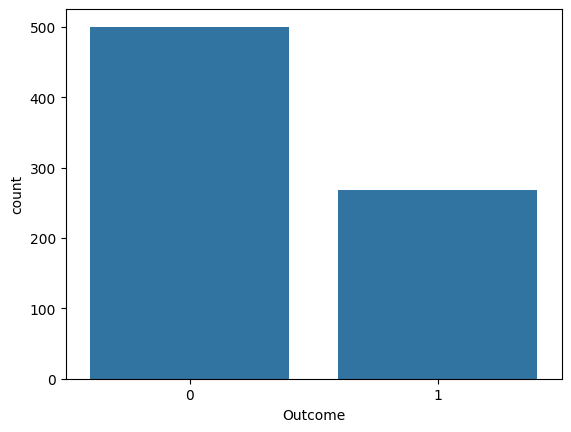

In [181]:
sns.countplot(x='Outcome', data=df)

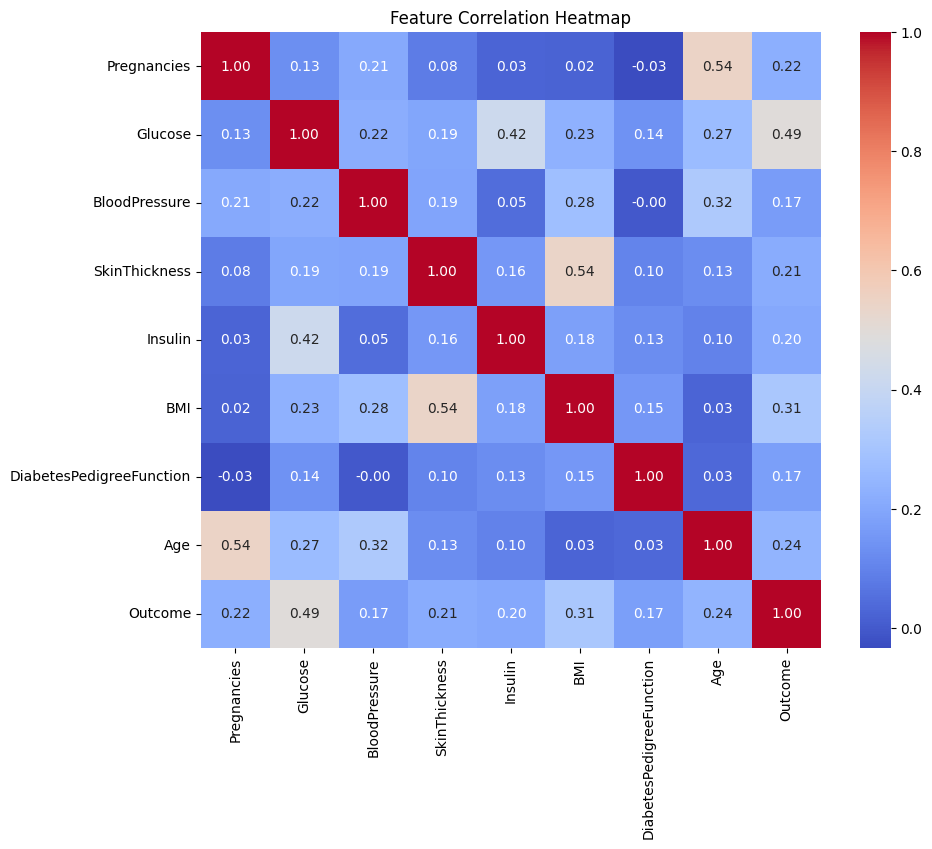

In [182]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

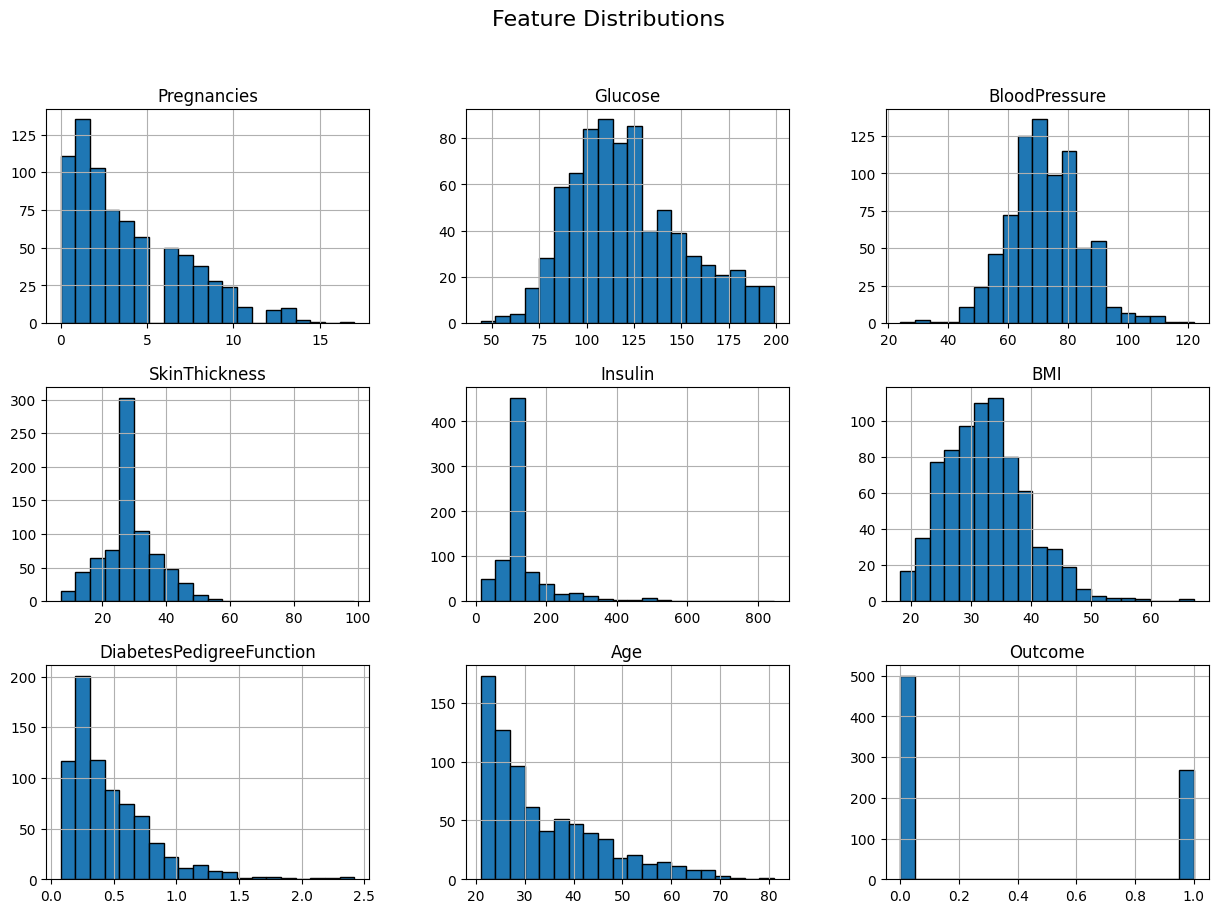

In [183]:
# Distribution of features
df.hist(figsize=(15,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", size=16)
plt.show()

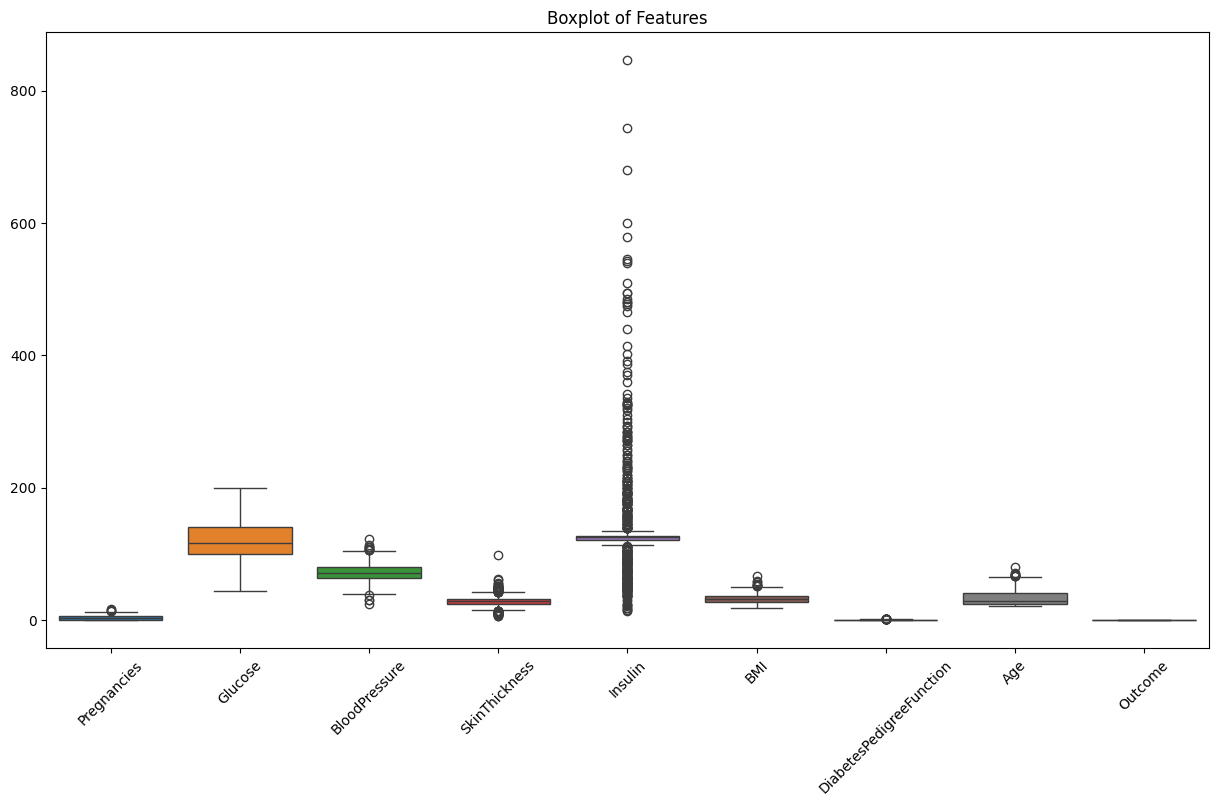

In [184]:
# Boxplots for outlier detection
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

<Axes: xlabel='Outcome'>

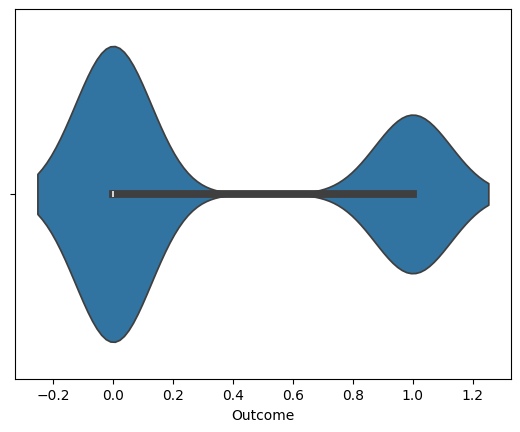

In [185]:
sns.violinplot(x='Outcome', data=df)

4. Splitting the dataset

In [186]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)


In [188]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25
46,1,146.0,56.0,29.0,125.0,29.7,0.564,29
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22
...,...,...,...,...,...,...,...,...
451,2,134.0,70.0,29.0,125.0,28.9,0.542,23
113,4,76.0,62.0,29.0,125.0,34.0,0.391,25
556,1,97.0,70.0,40.0,125.0,38.1,0.218,30
667,10,111.0,70.0,27.0,125.0,27.5,0.141,40


In [189]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159.0,64.0,29.0,125.0,27.4,0.294,40
672,10,68.0,106.0,23.0,49.0,35.5,0.285,47
700,2,122.0,76.0,27.0,200.0,35.9,0.483,26
630,7,114.0,64.0,29.0,125.0,27.4,0.732,34
81,2,74.0,72.0,29.0,125.0,32.3,0.102,22
...,...,...,...,...,...,...,...,...
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22
637,2,94.0,76.0,18.0,66.0,31.6,0.649,23
593,2,82.0,52.0,22.0,115.0,28.5,1.699,25
425,4,184.0,78.0,39.0,277.0,37.0,0.264,31


In [190]:
y_train

353    0
711    0
373    0
46     0
682    0
      ..
451    1
113    0
556    0
667    1
107    0
Name: Outcome, Length: 614, dtype: int64

In [191]:
y_test

44     0
672    0
700    0
630    1
81     0
      ..
32     0
637    0
593    0
425    1
273    0
Name: Outcome, Length: 154, dtype: int64

5. Feature Scaling

In [192]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

5. Balancing data


In [193]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_res))

Before SMOTE: [400 214]
After SMOTE: [400 400]


6. Implementing Model and Evaluation

In [194]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    if y_proba is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        prc_auc = auc(recall, precision)
        print("Precision-Recall AUC:", prc_auc)
    
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)



Model: Logistic Regression
Accuracy: 0.7012987012987013
Precision: 0.5869565217391305
Recall: 0.5
F1 Score: 0.54
ROC AUC Score: 0.812962962962963
Precision-Recall AUC: 0.6677138384687028
Confusion Matrix:
 [[81 19]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


Model: Random Forest
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.5925925925925926
F1 Score: 0.6274509803921569
ROC AUC Score: 0.8070370370370371
Precision-Recall AUC: 0.6818102966782736
Confusion Matrix:
 [[84 16]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0

Standard metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix, ROC-AUC.
Accuracy alone can be misleading if classes are imbalanced.

In [195]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"{name} - CV Mean F1: {scores.mean():.4f} | Std: {scores.std():.4f}")



Logistic Regression - CV Mean F1: 0.6537 | Std: 0.0265
Random Forest - CV Mean F1: 0.6406 | Std: 0.0278
Support Vector Machine - CV Mean F1: 0.5919 | Std: 0.0627
XGBoost - CV Mean F1: 0.6111 | Std: 0.0466


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']   # required for l1
}

grid_search_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid_lr,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)


Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [198]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_search_xgb = GridSearchCV(
    XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:51] WARN

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:52] WARN

In [199]:
final_models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

for name, model in final_models.items():
    evaluate_model(name, model, X_test, y_test)


Model: Logistic Regression
Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454
ROC AUC Score: 0.8138888888888889
Precision-Recall AUC: 0.6685665367697619
Confusion Matrix:
 [[82 18]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Model: Random Forest
Accuracy: 0.7792207792207793
Precision: 0.7272727272727273
Recall: 0.5925925925925926
F1 Score: 0.6530612244897959
ROC AUC Score: 0.8191666666666666
Precision-Recall AUC: 0.7022540177797506
Confusion Matrix:
 [[88 12]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0

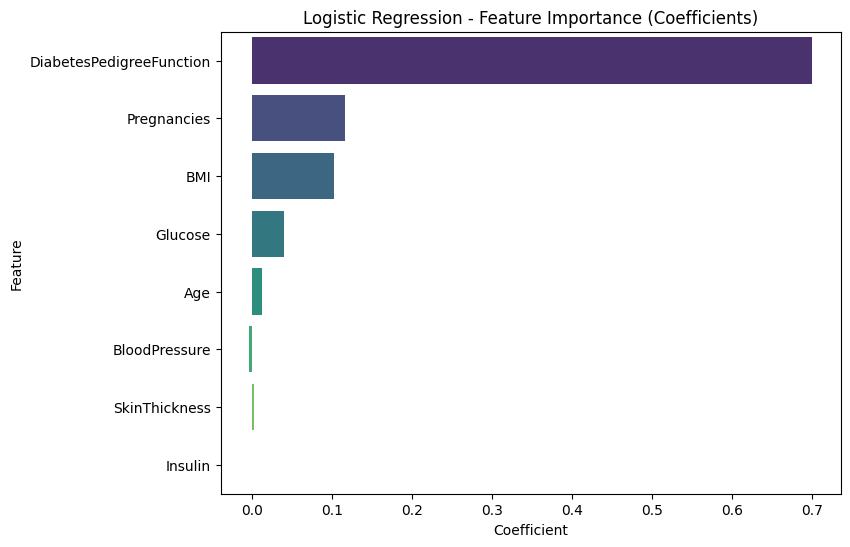

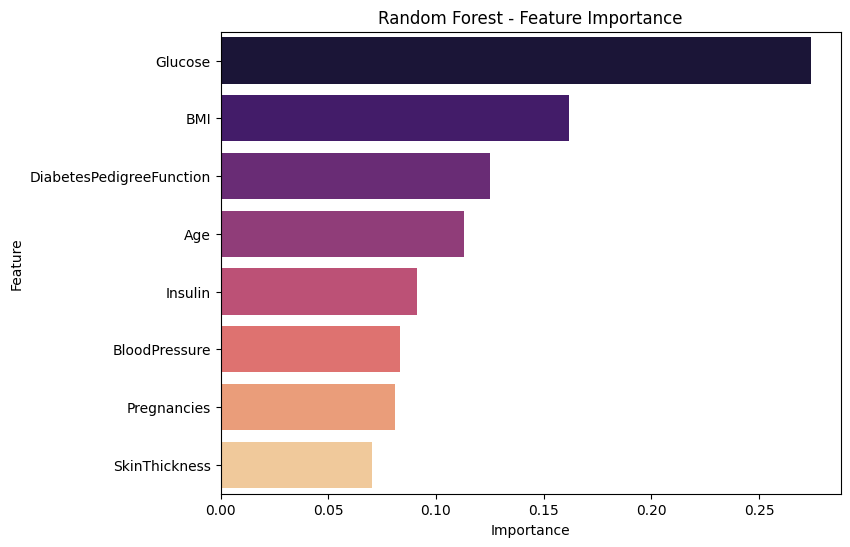

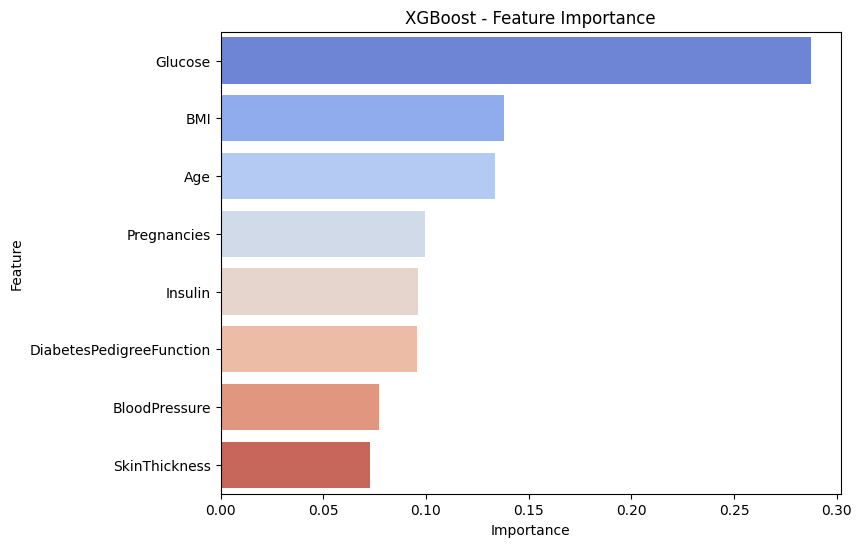

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train.columns

log_reg_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": best_lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Coefficient", y="Feature", data=log_reg_importance, palette="viridis")
plt.title("Logistic Regression - Feature Importance (Coefficients)")
plt.show()

rf_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=rf_importance, palette="magma")
plt.title("Random Forest - Feature Importance")
plt.show()


xgb_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": best_xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=xgb_importance, palette="coolwarm")
plt.title("XGBoost - Feature Importance")
plt.show()



7. Calibration 

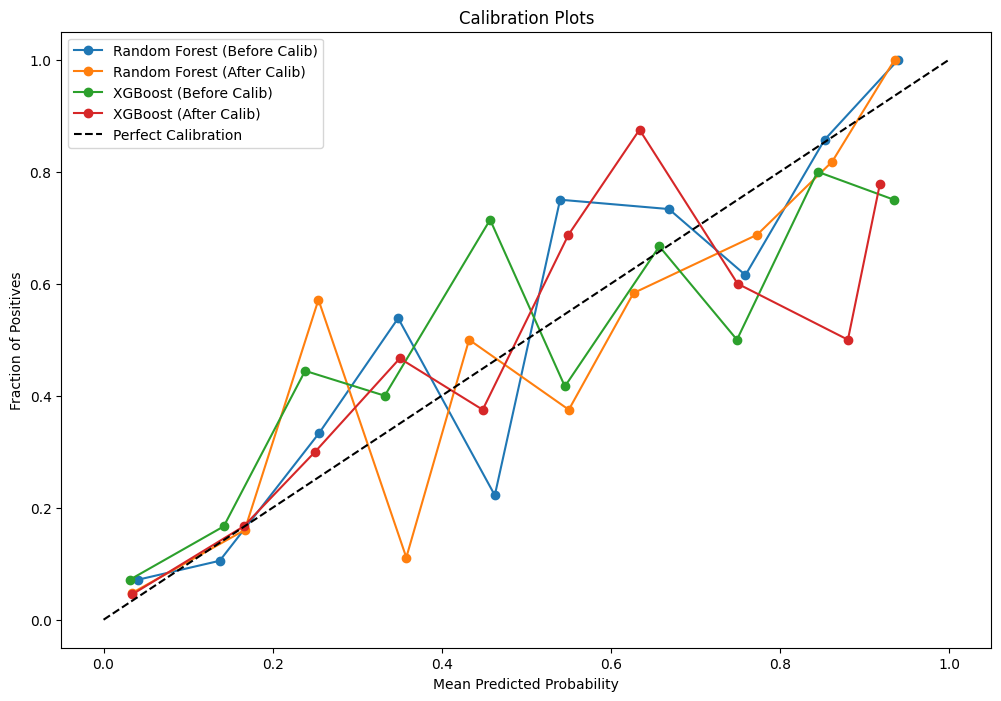

In [201]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import numpy as np

calibrated_rf = CalibratedClassifierCV(best_rf, method='isotonic', cv=5)
calibrated_rf.fit(X_train, y_train)

calibrated_xgb = CalibratedClassifierCV(best_xgb, method='isotonic', cv=5)
calibrated_xgb.fit(X_train, y_train)

plt.figure(figsize=(12, 8))

for clf, name in [(best_rf, "Random Forest (Before Calib)"), 
                  (calibrated_rf, "Random Forest (After Calib)"),
                  (best_xgb, "XGBoost (Before Calib)"), 
                  (calibrated_xgb, "XGBoost (After Calib)")]:
    
    prob_pos = clf.predict_proba(X_test)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "o-", label=name)

plt.plot([0, 1], [0, 1], "k--", label="Perfect Calibration")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Plots")
plt.legend()
plt.show()

Tried multiple classifiers but choosing XGBoost for its strong predictive performance and ability to handle imbalanced datasets.

Recall for class 1 (diabetic) = how many actual diabetic patients were correctly identified.

In healthcare, high recall is more important than precision:
A false negative (missed diabetic case) is riskier than a false positive (predicting diabetes when the person is healthy, which just leads to further medical testing).

Therefore, the model was optimized to improve recall, even if it reduced precision slightly.

8. Threshold Tuning

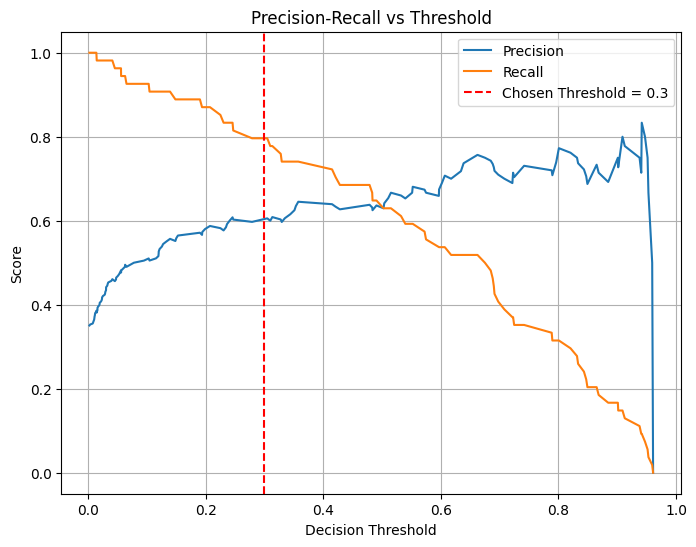

Chosen Threshold: 0.3
Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       100
           1       0.61      0.80      0.69        54

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.75       154

Confusion Matrix (Adjusted Threshold):
[[72 28]
 [11 43]]


In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

y_probs = best_xgb.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.axvline(x=0.3, color='red', linestyle='--', label="Chosen Threshold = 0.3")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

optimal_threshold = 0.3
print(f"Chosen Threshold: {optimal_threshold}")

y_pred_new = (y_probs >= optimal_threshold).astype(int)

print("Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_new))

print("Confusion Matrix (Adjusted Threshold):")
print(confusion_matrix(y_test, y_pred_new))


Threshold Adjustment


Default threshold = 0.5 gave recall ~63%.


Adjusted threshold to 0.3, which improved recall to 80%, while keeping precision at 61%.

This means the model now catches more diabetic patients, reducing missed cases.

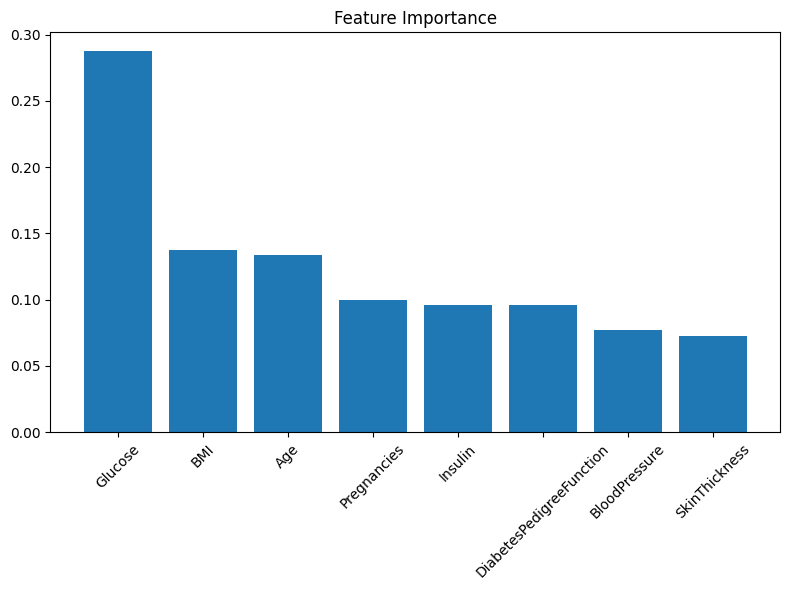

In [203]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from the best model
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()


In [204]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_xgb, X, y, cv=10, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [0.71428571 0.75324675 0.71428571 0.67532468 0.71428571 0.77922078
 0.80519481 0.81818182 0.72368421 0.81578947]
Average CV score: 0.75134996582365


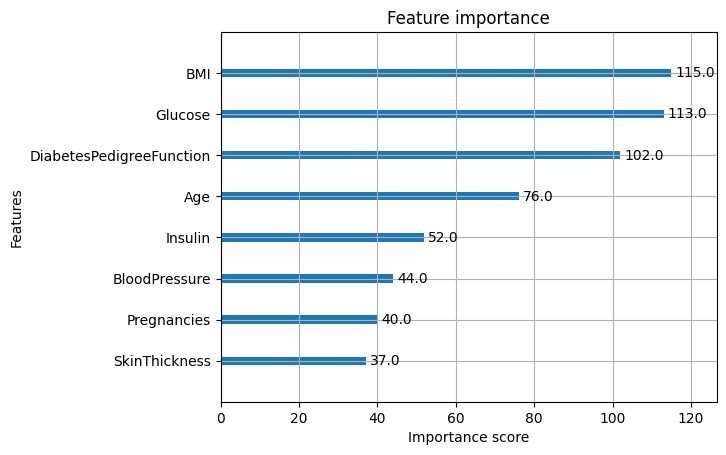

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb, importance_type="weight", max_num_features=10)
plt.show()


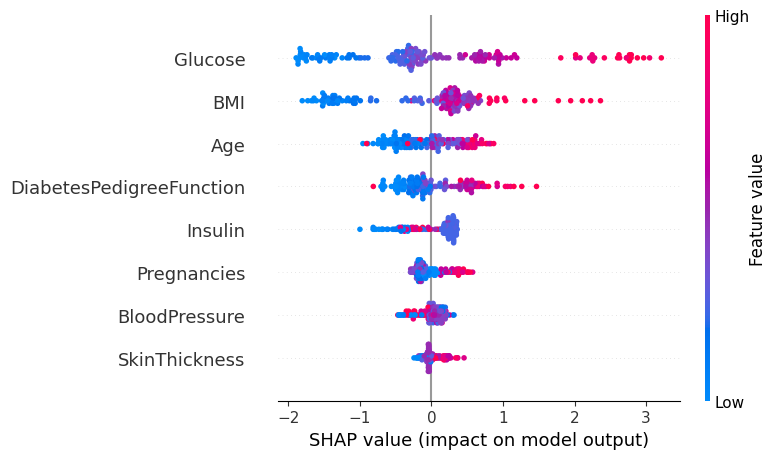

In [ ]:
import shap

explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


Final Results & Insights


Accuracy: ~75%

Recall for diabetic patients (class 1): 80% (priority metric)

Precision: 61% (acceptable trade-off)

Confusion Matrix: fewer false negatives after threshold tuning.

Takeaway: Model is more reliable for screening, as it prioritizes identifying diabetic patients.

In [207]:
import joblib

joblib.dump(best_xgb, "xgb_diabetes_model.pkl")

loaded_model = joblib.load("xgb_diabetes_model.pkl")

y_pred = loaded_model.predict(X_test)
